<a href="https://colab.research.google.com/github/andrewwgordon/NASA_C-MAPSS/blob/main/NASA_C_MAPSS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [116]:
# import the Numpy and Pandas libraries
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [3]:
# set the directory path to the C-MAPSS datasets (note this will differ on Windows)
dir_path = './CMaps/'
# define the dataframe column names as a list
column_names = [
    'unit',
    'cycles',
    'altitude',
    'air_speed',
    'throttle_angle'
]
# programatically generate the sensor names
sensor_names = ['sensor_{}'.format(i) for i in range(1,22)]
# concatenate the column names together
column_names = column_names + sensor_names
# load the train_FD001.txt dataset as a space delimited file (sep='\s+')
fd001_train = pd.read_csv((dir_path + 'train_FD001.txt'), sep='\s+', header = None, names = column_names)

In [ ]:
# provide a statistical summary of the dataset
fd001_train.describe()

unit        cycles      altitude     air_speed  throttle_angle  \
count  20631.000000  20631.000000  20631.000000  20631.000000         20631.0   
mean      51.506568    108.807862     -0.000009      0.000002           100.0   
std       29.227633     68.880990      0.002187      0.000293             0.0   
min        1.000000      1.000000     -0.008700     -0.000600           100.0   
25%       26.000000     52.000000     -0.001500     -0.000200           100.0   
50%       52.000000    104.000000      0.000000      0.000000           100.0   
75%       77.000000    156.000000      0.001500      0.000300           100.0   
max      100.000000    362.000000      0.008700      0.000600           100.0   

       sensor_1      sensor_2      sensor_3      sensor_4      sensor_5  ...  \
count  20631.00  20631.000000  20631.000000  20631.000000  2.063100e+04  ...   
mean     518.67    642.680934   1590.523119   1408.933782  1.462000e+01  ...   
std        0.00      0.500053      6.131150      9.000605  1.776400e-15  ...   
min      518.67    641.210000   1571.040000   1382.250000  1.462000e+01  ...   
25%      518.67    642.325000   1586.260000   1402.360000  1.462000e+01  ...   
50%      518.67    642.640000   1590.100000   1408.040000  1.462000e+01  ...   
75%      518.67    643.000000   1594.380000   1414.555000  1.462000e+01  ...   
max      518.67    644.530000   1616.910000   1441.490000  1.462000e+01  ...   

          sensor_12     sensor_13     sensor_14     sensor_15     sensor_16  \
count  20631.000000  20631.000000  20631.000000  20631.000000  2.063100e+04   
mean     521.413470   2388.096152   8143.752722      8.442146  3.000000e-02   
std        0.737553      0.071919     19.076176      0.037505  1.387812e-17   
min      518.690000   2387.880000   8099.940000      8.324900  3.000000e-02   
25%      520.960000   2388.040000   8133.245000      8.414900  3.000000e-02   
50%      521.480000   2388.090000   8140.540000      8.438900  3.000000e-02   
75%      521.950000   2388.140000   8148.310000      8.465600  3.000000e-02   
max      523.380000   2388.560000   8293.720000      8.584800  3.000000e-02   

          sensor_17  sensor_18  sensor_19     sensor_20     sensor_21  
count  20631.000000    20631.0    20631.0  20631.000000  20631.000000  
mean     393.210654     2388.0      100.0     38.816271     23.289705  
std        1.548763        0.0        0.0      0.180746      0.108251  
min      388.000000     2388.0      100.0     38.140000     22.894200  
25%      392.000000     2388.0      100.0     38.700000     23.221800  
50%      393.000000     2388.0      100.0     38.830000     23.297900  
75%      394.000000     2388.0      100.0     38.950000     23.366800  
max      400.000000     2388.0      100.0     39.430000     23.618400  

[8 rows x 26 columns]

In [4]:
# display an initial set of rows
fd001_train.head()

unit  cycles  altitude  air_speed  throttle_angle  sensor_1  sensor_2  \
0     1       1   -0.0007    -0.0004           100.0    518.67    641.82   
1     1       2    0.0019    -0.0003           100.0    518.67    642.15   
2     1       3   -0.0043     0.0003           100.0    518.67    642.35   
3     1       4    0.0007     0.0000           100.0    518.67    642.35   
4     1       5   -0.0019    -0.0002           100.0    518.67    642.37   

   sensor_3  sensor_4  sensor_5  ...  sensor_12  sensor_13  sensor_14  \
0   1589.70   1400.60     14.62  ...     521.66    2388.02    8138.62   
1   1591.82   1403.14     14.62  ...     522.28    2388.07    8131.49   
2   1587.99   1404.20     14.62  ...     522.42    2388.03    8133.23   
3   1582.79   1401.87     14.62  ...     522.86    2388.08    8133.83   
4   1582.85   1406.22     14.62  ...     522.19    2388.04    8133.80   

   sensor_15  sensor_16  sensor_17  sensor_18  sensor_19  sensor_20  sensor_21  
0     8.4195       0.03        392       2388      100.0      39.06    23.4190  
1     8.4318       0.03        392       2388      100.0      39.00    23.4236  
2     8.4178       0.03        390       2388      100.0      38.95    23.3442  
3     8.3682       0.03        392       2388      100.0      38.88    23.3739  
4     8.4294       0.03        393       2388      100.0      38.90    23.4044  

[5 rows x 26 columns]

In [5]:
# filter the dataset where sensor_13 > 200 and unit equals 25 and extract only the altitude column into a new dataframe new_df
new_df = fd001_train[(fd001_train['sensor_13'] > 200) & (fd001_train['unit']==25)]['altitude']

In [6]:
new_df.head()

4880   -0.0021
4881   -0.0003
4882   -0.0016
4883   -0.0004
4884    0.0021
Name: altitude, dtype: float64

In [7]:
# show the maximum number of cycles per engine unit no as a dataframe (reset_index)
fd001_train.groupby(['unit'])['cycles'].max().reset_index()

unit  cycles
0      1     192
1      2     287
2      3     179
3      4     189
4      5     269
..   ...     ...
95    96     336
96    97     202
97    98     156
98    99     185
99   100     200

[100 rows x 2 columns]

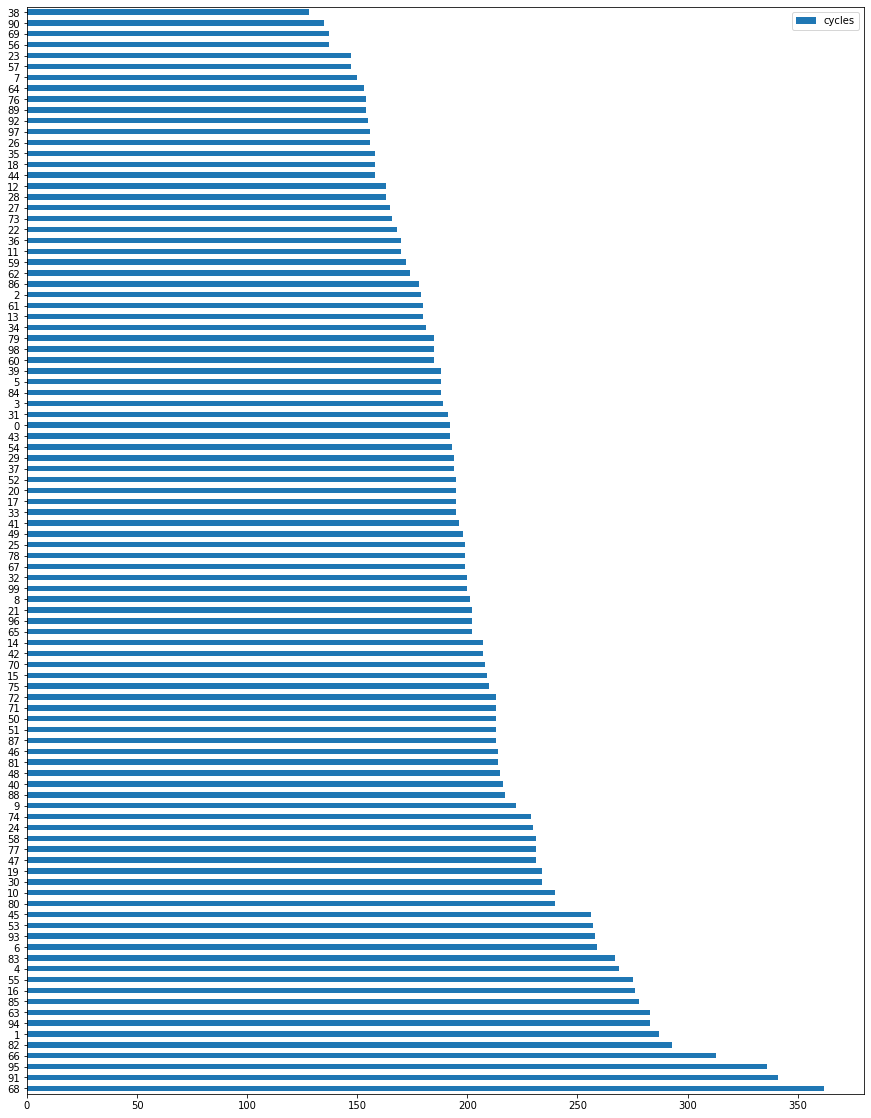

In [8]:
# get the maximum number of cycles per engine unit as a dataframe, sort by cycles descending and plot as a horizontal
# bar graph with a figsize of 15,20
fd001_train.groupby(['unit'])['cycles'].max().reset_index().sort_values(['cycles'],ascending=False).plot.barh(y='cycles',figsize=(15,20))

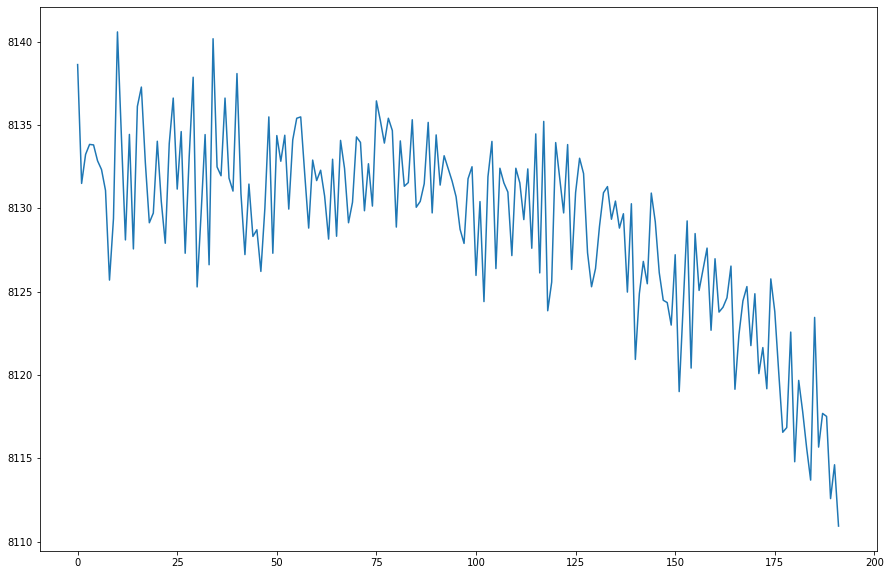

In [9]:
# plot a line graph of sensor_14 where engine unit equals 1
fd001_train[fd001_train['unit']==1]['sensor_14'].plot(figsize=(15,10))

In [64]:
# Exercise 1
# Load the train_fd001.txt file in a dataframe and specify all 26 columns names 
# as per the specification in slide 6 of the pack
column_names = [
    'unit',
    'cycles',
    'altitude',
    'air_speed',
    'throttle_angle',
    'fan_inlet_temp',
    'lpc_outlet_temp',
    'hpc_outlet_temp',
    'lpt_outlet_temp',
    'fan_inlet_pressure',
    'bypass_duct_pressure',
    'hpc_outlet_pressure',
    'physical_fan_speed',
    'physical_core_speed',
    'engine_pressure_ratio',
    'hpc_outlet_static_pressure',
    'fuel_flow_ratio',
    'corrected_fan_speed',
    'corrected_core_speed',
    'bypass_ratio',
    'burner_fuel_air_ratio',
    'bleed_enthalpy',
    'demanded_fan_speed',
    'demanded_fan_conversion_speed',
    'hpt_coolant_bleed',
    'lpt_coolant_bleed'
]
# There should be 26 columns
print('{0} columns.'.format(len(column_names)))
fd001_train = pd.read_csv((dir_path + 'train_FD001.txt'), sep='\s+', header = None, names = column_names)
fd001_train.describe()

26 columns.


unit        cycles      altitude     air_speed  throttle_angle  \
count  20631.000000  20631.000000  20631.000000  20631.000000         20631.0   
mean      51.506568    108.807862     -0.000009      0.000002           100.0   
std       29.227633     68.880990      0.002187      0.000293             0.0   
min        1.000000      1.000000     -0.008700     -0.000600           100.0   
25%       26.000000     52.000000     -0.001500     -0.000200           100.0   
50%       52.000000    104.000000      0.000000      0.000000           100.0   
75%       77.000000    156.000000      0.001500      0.000300           100.0   
max      100.000000    362.000000      0.008700      0.000600           100.0   

       fan_inlet_temp  lpc_outlet_temp  hpc_outlet_temp  lpt_outlet_temp  \
count        20631.00     20631.000000     20631.000000     20631.000000   
mean           518.67       642.680934      1590.523119      1408.933782   
std              0.00         0.500053         6.131150         9.000605   
min            518.67       641.210000      1571.040000      1382.250000   
25%            518.67       642.325000      1586.260000      1402.360000   
50%            518.67       642.640000      1590.100000      1408.040000   
75%            518.67       643.000000      1594.380000      1414.555000   
max            518.67       644.530000      1616.910000      1441.490000   

       fan_inlet_pressure  ...  fuel_flow_ratio  corrected_fan_speed  \
count        2.063100e+04  ...     20631.000000         20631.000000   
mean         1.462000e+01  ...       521.413470          2388.096152   
std          1.776400e-15  ...         0.737553             0.071919   
min          1.462000e+01  ...       518.690000          2387.880000   
25%          1.462000e+01  ...       520.960000          2388.040000   
50%          1.462000e+01  ...       521.480000          2388.090000   
75%          1.462000e+01  ...       521.950000          2388.140000   
max          1.462000e+01  ...       523.380000          2388.560000   

       corrected_core_speed  bypass_ratio  burner_fuel_air_ratio  \
count          20631.000000  20631.000000           2.063100e+04   
mean            8143.752722      8.442146           3.000000e-02   
std               19.076176      0.037505           1.387812e-17   
min             8099.940000      8.324900           3.000000e-02   
25%             8133.245000      8.414900           3.000000e-02   
50%             8140.540000      8.438900           3.000000e-02   
75%             8148.310000      8.465600           3.000000e-02   
max             8293.720000      8.584800           3.000000e-02   

       bleed_enthalpy  demanded_fan_speed  demanded_fan_conversion_speed  \
count    20631.000000             20631.0                        20631.0   
mean       393.210654              2388.0                          100.0   
std          1.548763                 0.0                            0.0   
min        388.000000              2388.0                          100.0   
25%        392.000000              2388.0                          100.0   
50%        393.000000              2388.0                          100.0   
75%        394.000000              2388.0                          100.0   
max        400.000000              2388.0                          100.0   

       hpt_coolant_bleed  lpt_coolant_bleed  
count       20631.000000       20631.000000  
mean           38.816271          23.289705  
std             0.180746           0.108251  
min            38.140000          22.894200  
25%            38.700000          23.221800  
50%            38.830000          23.297900  
75%            38.950000          23.366800  
max            39.430000          23.618400  

[8 rows x 26 columns]

In [65]:
# Exercise 2
# Show the mean Altitude grouped by Engine Unit No as a dataframe
fd001_train.groupby(['unit'])['altitude'].mean().reset_index()

unit  altitude
0      1 -0.000189
1      2  0.000051
2      3  0.000137
3      4  0.000150
4      5  0.000136
..   ...       ...
95    96 -0.000120
96    97 -0.000059
97    98  0.000269
98    99 -0.000185
99   100 -0.000148

[100 rows x 2 columns]

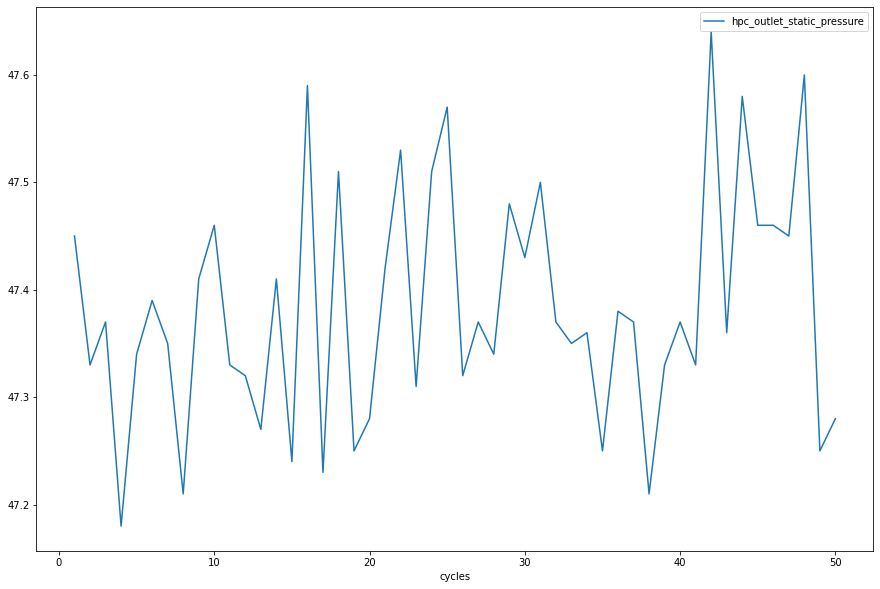

In [66]:
# Exercise 3
# Plot a line graph of HPC Outlet Static Pressure for Engine Unit No. 35 for Cycles 0 to 50
fd001_train[(fd001_train['unit']==35) & (fd001_train['cycles'] <= 50)][['cycles','hpc_outlet_static_pressure']].plot(x='cycles',y='hpc_outlet_static_pressure',figsize=(15,10))

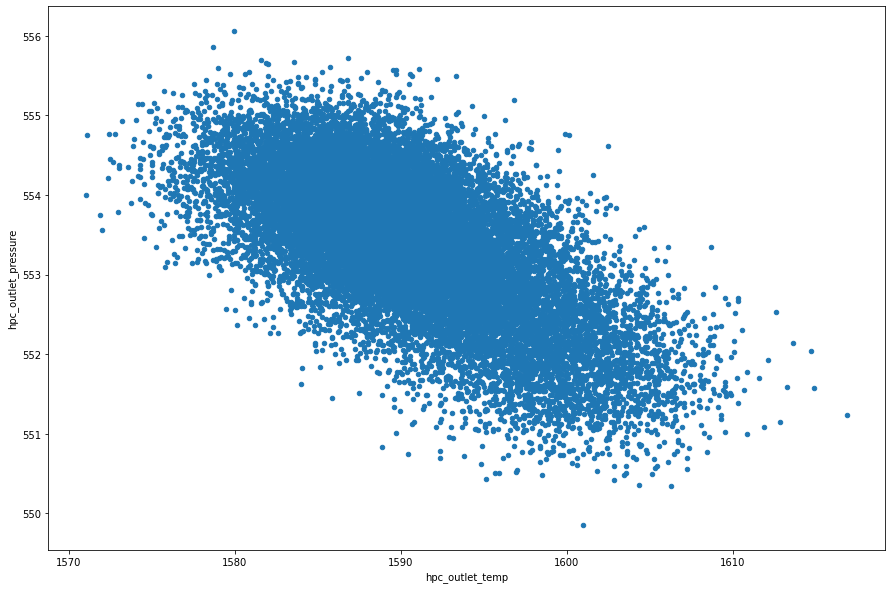

In [67]:
# Exercise 4 (Bonus)
# Plot a scatter graph of HPC Outlet Temperature vs. HPC Outlet Pressure for all Engine Unit Nos.
fd001_train[['hpc_outlet_temp','hpc_outlet_pressure']].plot.scatter(x='hpc_outlet_temp',y='hpc_outlet_pressure',figsize=(15,10))

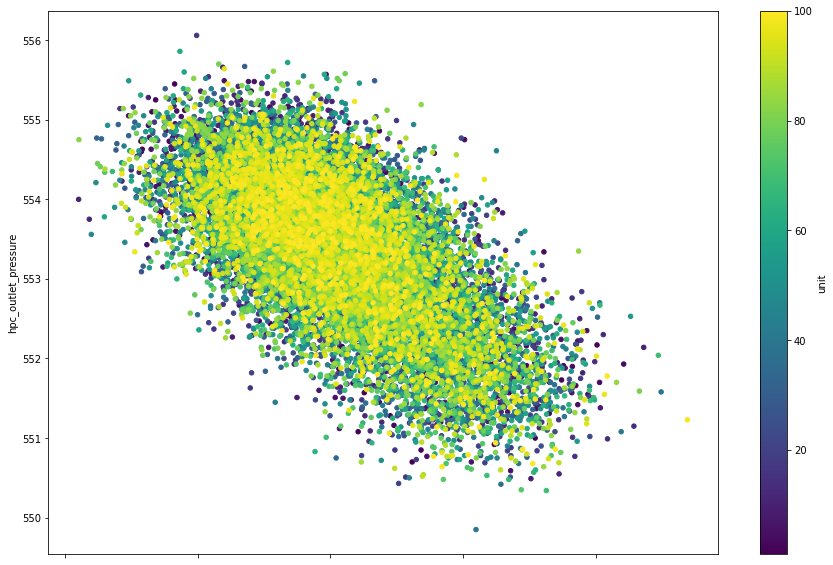

In [68]:
# Exercise 5 (Bonus Bonus)
# Plot a scatter graph of HPC Outlet Temperature vs. HPC Outlet Pressure segmented by Engine Unit No as a colour map
fd001_train[['hpc_outlet_temp','hpc_outlet_pressure','unit']].plot.scatter(x='hpc_outlet_temp',y='hpc_outlet_pressure',c='unit',colormap='viridis',figsize=(15,10))

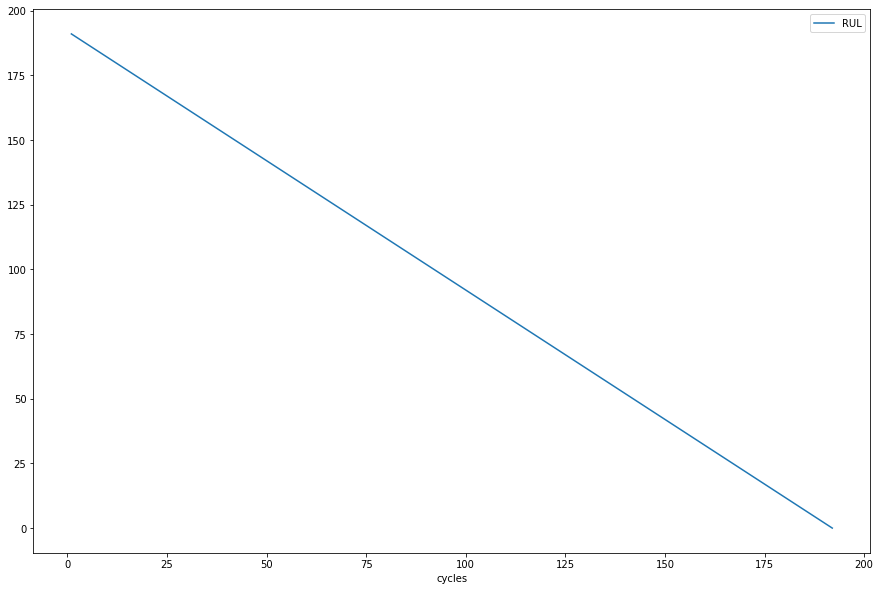

In [83]:
# function to calculate Remaining Useful Life
def calculate_RUL(df):
  df['RUL'] = max(df['cycles']) - df['cycles']
  return df
# append the training dataframe with the RUL column
fd001_train = fd001_train.groupby('unit').apply(calculate_RUL)  
# plot remaining useful life versus cycles for engine unit 1.
# we've simplified RUL as a linear function, a more realistic function is via a P-F Curve
fd001_train[fd001_train['unit'] == 1][['cycles','RUL']].plot(x='cycles',y='RUL',figsize=(15,10))

In [125]:
fd001_train.corrwith(fd001_train['RUL'],method = 'spearman')

/usr/local/lib/python3.7/dist-packages/scipy/stats/stats.py:4484: SpearmanRConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(SpearmanRConstantInputWarning())


unit                             0.057624
cycles                          -0.786844
altitude                        -0.001332
air_speed                       -0.003776
throttle_angle                        NaN
fan_inlet_temp                        NaN
lpc_outlet_temp                 -0.628588
hpc_outlet_temp                 -0.605609
lpt_outlet_temp                 -0.701771
fan_inlet_pressure                    NaN
bypass_duct_pressure            -0.128070
hpc_outlet_pressure              0.678845
physical_fan_speed              -0.573864
physical_core_speed             -0.322014
engine_pressure_ratio                 NaN
hpc_outlet_static_pressure      -0.718132
fuel_flow_ratio                  0.693149
corrected_fan_speed             -0.572549
corrected_core_speed            -0.201792
bypass_ratio                    -0.665905
burner_fuel_air_ratio                 NaN
bleed_enthalpy                  -0.629397
demanded_fan_speed                    NaN
demanded_fan_conversion_speed     

In [85]:
import seaborn as sns

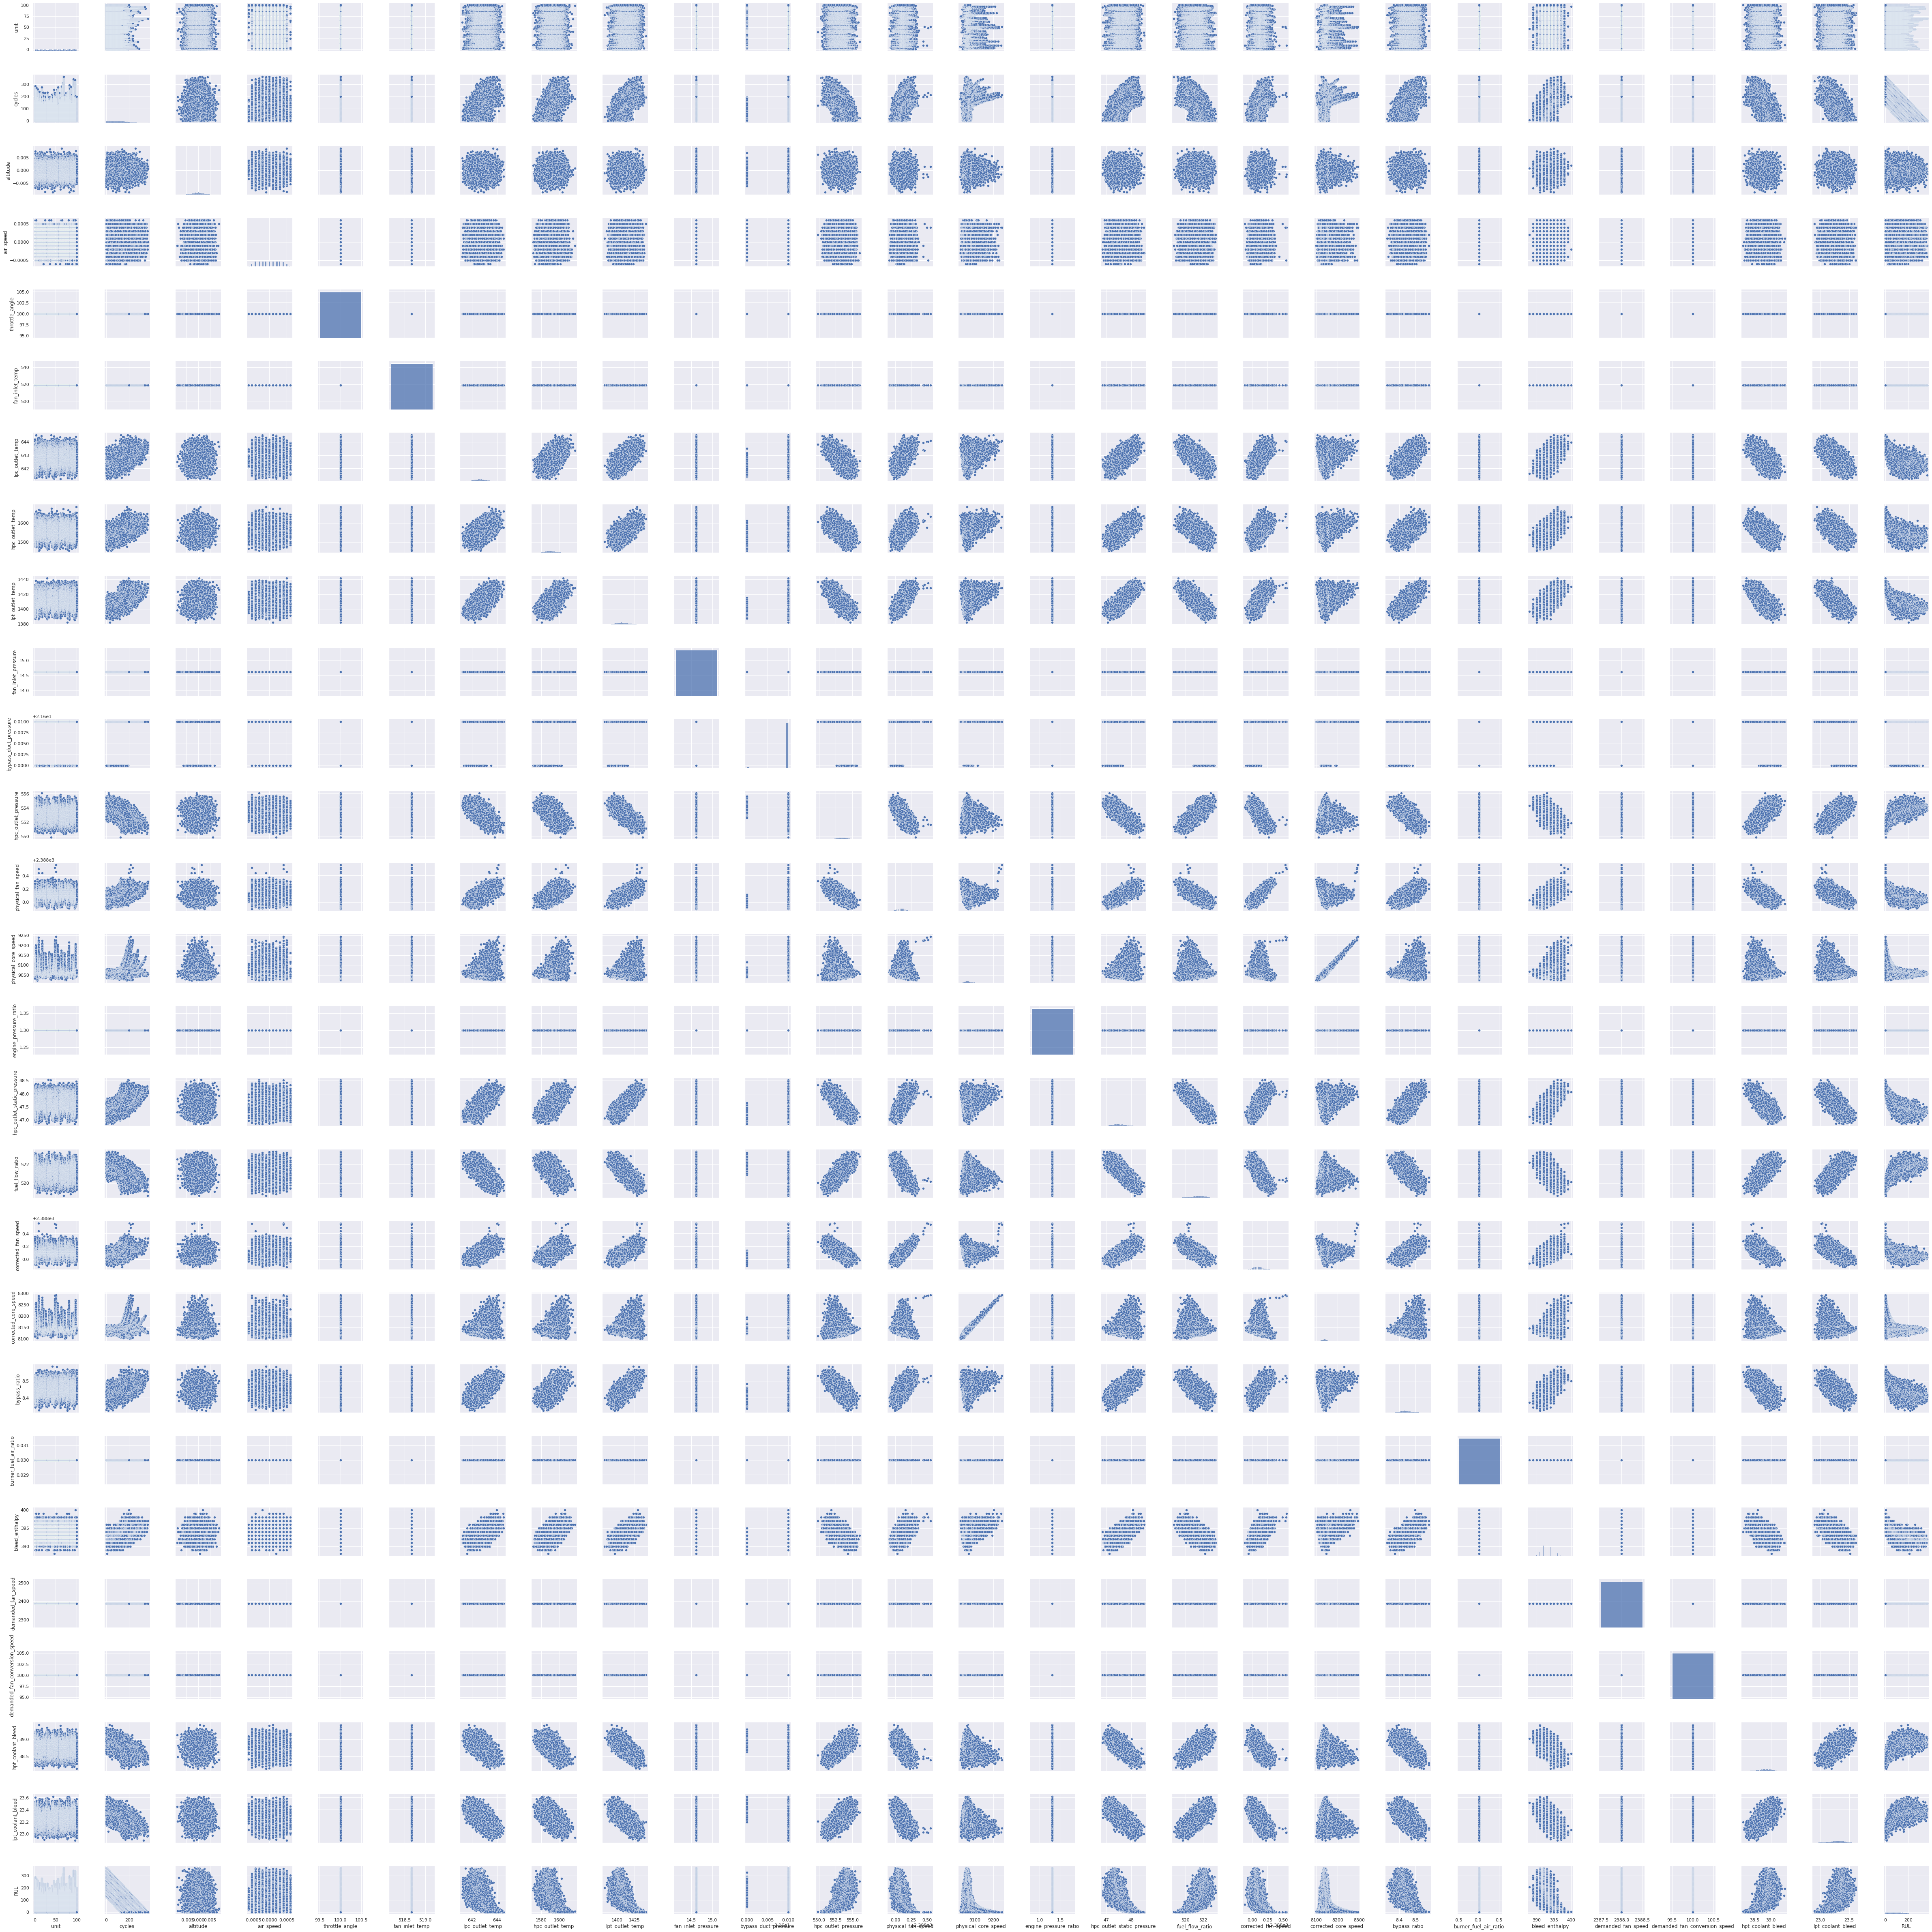

In [89]:
sns.pairplot(fd001_train)

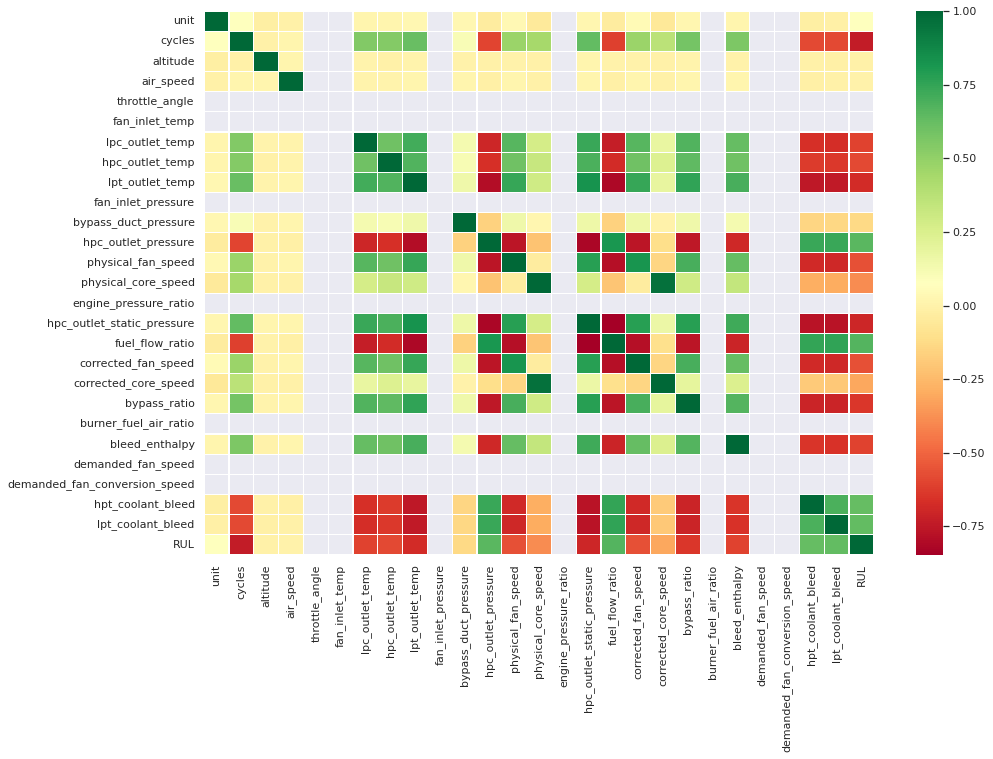

In [118]:
plt.figure(figsize=(15,10))
sns.heatmap(fd001_train.corr(),annot=False,cmap='RdYlGn',linewidths=0.1)